In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [6]:
conn = sqlite3.connect('tweets.db')
c = conn.cursor()

In [74]:
c.execute(""" SELECT x_coordinate, y_coordinate
          FROM coordinates
""")
coordinates = c.fetchall()

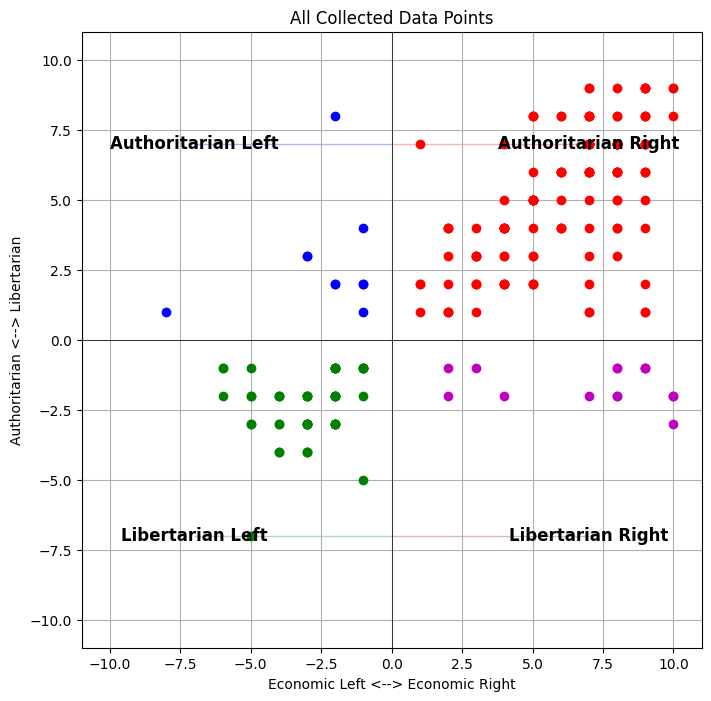

In [75]:
# Define political compass coordinates and colors for each quadrant
political_compass = {
    "Authoritarian Left": (-7, 7, 'blue'),
    "Authoritarian Right": (7, 7, 'red'),
    "Libertarian Left": (-7, -7, 'green'),
    "Libertarian Right": (7, -7, 'purple'),
}

# Plot political compass
plt.figure(figsize=(8, 8))
for ideology, (x, y, color) in political_compass.items():
    plt.text(x, y, ideology, ha='center', va='center', fontsize=12, color='black', fontweight='bold')
    if x < 0 and y > 0:
        plt.fill([x, 0, 0], [y, 7, 7], color=color, alpha=0.3)
    elif x > 0 and y > 0:
        plt.fill([x, 0, 0], [y, 7, 7], color=color, alpha=0.3)
    elif x < 0 and y < 0:
        plt.fill([x, 0, 0], [-7, -7, y], color=color, alpha=0.3)
    elif x > 0 and y < 0:
        plt.fill([x, 0, 0], [-7, -7, y], color=color, alpha=0.3)

# Fetch coordinates from database
data = coordinates

# Plot coordinates from database with different colors based on quadrant
for x, y in data:
    if x < 0 and y > 0:
        plt.plot(x, y, 'bo')  # Blue for Authoritarian Left
    elif x > 0 and y > 0:
        plt.plot(x, y, 'ro')  # Red for Authoritarian Right
    elif x < 0 and y < 0:
        plt.plot(x, y, 'go')  # Green for Libertarian Left
    elif x > 0 and y < 0:
        plt.plot(x, y, 'mo')  # Purple for Libertarian Right

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-11, 11)  # Set x-axis limits
plt.ylim(-11, 11)  # Set y-axis limits
plt.title("All Collected Data Points", loc='center')
plt.xlabel("Economic Left <--> Economic Right")
plt.ylabel("Authoritarian <--> Libertarian")
plt.grid(True)
plt.show()


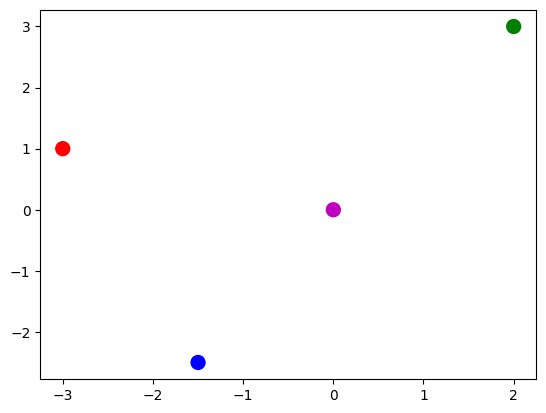

In [16]:
from pylab import *

x = [0,2,-3,-1.5]
y = [0,3,1,-2.5]
color=['m','g','r','b']

scatter(x,y, s=100 ,marker='o', c=color)

show()